In [60]:
! git clone https://github.com/sam1610/Inference_DIRinfo.git

Cloning into 'Inference_DIRinfo'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (89/89), done.
remote: Total 91 (delta 14), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (91/91), done.


In [1]:
# import data science and visualization libraries
import io
import os
import time  
import boto3
import numpy as np
import pandas as pd
import sagemaker.amazon.common as smac
from sklearn.preprocessing import StandardScaler

In [2]:
import sagemaker
from sagemaker import get_execution_role
role = get_execution_role()
sess = sagemaker.Session()

In [3]:
! aws s3  ls s3://sec-students2016/sam1610 --recursive

2020-04-29 09:35:08     698612 sam1610
2020-02-18 11:05:08          0 sam1610/
2020-04-14 11:28:35    2742565 sam1610/aws_data.csv
2020-04-26 08:31:55    5994825 sam1610/aws_data_classification.csv
2020-04-15 08:54:58    5897018 sam1610/aws_data_regression.csv
2020-04-28 06:12:04     694922 sam1610/inference_std.csv
2020-02-18 14:29:22      17752 sam1610/model/xgboost-Students-v1-2020-02-18-14-25-40-858/output/model.tar.gz
2020-03-09 18:19:13      17753 sam1610/model/xgboost-Students-v1-2020-03-09-18-16-13-213/output/model.tar.gz
2020-04-15 09:41:04       1340 sam1610/output/job-Student-1586943322/output/model.tar.gz
2020-04-29 11:28:51       1335 sam1610/output/job-Student-1588159437/output/model.tar.gz
2020-04-13 10:02:30       3625 sam1610/output/linear-learner-2020-04-13-09-58-30-398/output/model.tar.gz
2020-03-09 18:13:56      31346 sam1610/train.csv
2020-04-29 11:18:06    9281760 sam1610/train/linear_train.data
2020-04-29 09:40:06    2320800 sam1610/valid/linear_train.data
2020-0

In [4]:

# sec-students2016/sam1610/aws_data.csv 

bucket = "sec-students2016"
prefix = "sam1610"
key= prefix +"/inference_std.csv" # "/aws_data_classification.csv"

# i can read the file in float32
# df=pd.read_csv(location,dtype='float32')
#data = pd.read_csv('dt_encoded.csv', dtype='float32').values
boto3.resource('s3').Bucket(bucket).download_file(key, "data/inference_std.csv")

# df=pd.read_csv("data.csv", header=None, dtype="float32").values
#df.head(10)

In [5]:
a=pd.read_csv("data/inference_std.csv") # , header=None

In [6]:
a.head()
# a.iloc[:,1].value_counts()

,NAT_MARK,SCH_NM,PROV_NM,SUBM,Teacher_Gender,ACHIEVEMENTS1,MIDTERM1,FINAL1
0,0-60,0,0,0,1,28.0,17.0,45.0
1,0-60,0,0,0,1,27.0,14.0,41.5
2,0-60,0,0,0,1,27.0,13.0,27.5
3,0-60,0,0,0,1,26.0,15.0,44.0
4,0-60,0,0,0,1,25.0,14.0,31.5


In [46]:
a.drop(["GPA_class", "NAT_MARK", "GPA"], axis=1, inplace=True)

In [13]:
st=StandardScaler()
a[["ACHIEVEMENTS1", "MIDTERM1","FINAL1"]]= st.fit_transform(a[["ACHIEVEMENTS1", "MIDTERM1","FINAL1"]])

In [20]:
a["NAT_MARK"]=a["NAT_MARK"].map(
{"0-60":0, "60-70":1, "70-80":2, "80-90":3, "90-100":4}
)

In [21]:
a.head()

,NAT_MARK,SUBM,Teacher_Gender,ACHIEVEMENTS1,MIDTERM1,FINAL1,SCH_NM_0,SCH_NM_1,SCH_NM_2,SCH_NM_3,...,SCH_NM_93,SCH_NM_94,SCH_NM_95,SCH_NM_96,SCH_NM_97,SCH_NM_98,PROV_NM_0,PROV_NM_1,PROV_NM_2,PROV_NM_3
0,0,0,1,-0.026275,0.154956,0.697795,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,1,-0.459559,-0.672859,0.364605,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,-0.459559,-0.948798,-0.968151,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,1,-0.892843,-0.396921,0.602598,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,-1.326127,-0.672859,-0.587364,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [15]:
a=pd.get_dummies(a, columns=["SCH_NM", "PROV_NM"])

In [22]:
a.to_csv("data/aws_data_classification_clean.csv", header=False, index=False)

In [23]:
df=pd.read_csv("data/aws_data_classification_clean.csv", header=None, dtype="float32").values

In [50]:
df[0]

array([ 0.        ,  0.        ,  1.        , -0.00524724,  0.1635034 ,
        0.6988938 ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [24]:
from sklearn.model_selection import train_test_split
X, y = df[:, 1: ], df[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y )
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42) 

In [25]:
(unique, counts) = np.unique(y_train, return_counts=True)
np.asarray((unique, counts)).T


array([[0.0000e+00, 1.3469e+04],
       [1.0000e+00, 2.8160e+03],
       [2.0000e+00, 4.8500e+02],
       [3.0000e+00, 2.3000e+01]])

In [53]:
 
#                                                         train_instance_count=1,
#                                                         train_instance_type='ml.m4.xlarge',
#                                                         predictor_type='multiclass_classifier',
#                                                          num_classes=5,
#                                                         balance_multiclass_weights=True,
#                                                         early_stopping_patience=10,
#                                                         epochs=200,
#                                                         normalize_data=True,
#                                                         num_models=32

In [26]:
import sagemaker
from sagemaker.amazon.amazon_estimator import RecordSet
import boto3



balanced_multiclass_estimator = sagemaker.LinearLearner(role=sagemaker.get_execution_role(),
                                                        train_instance_count=1,
                                                        train_instance_type='ml.m4.xlarge',
                                                        predictor_type='multiclass_classifier',
                                                        num_classes=5,
                                                        balance_multiclass_weights=True,
                                                        early_stopping_patience=20,
                                                        epochs=250,
                                                        #normalize_data=True,
                                                        num_models=52,
                                                        #train_use_spot_instances=True
                                                      
                                                        
                                                        )

In [27]:
# wrap data in RecordSet objects
train_records = balanced_multiclass_estimator.record_set(X_train , y_train, channel='train')
val_records = balanced_multiclass_estimator.record_set(X_val, y_val, channel='validation')
test_records = balanced_multiclass_estimator.record_set(X_test, y_test, channel='test')

In [28]:
# start a training job
balanced_multiclass_estimator.fit([train_records, val_records, test_records])

2020-04-28 06:27:23 Starting - Starting the training job...
2020-04-28 06:27:25 Starting - Launching requested ML instances......
2020-04-28 06:28:33 Starting - Preparing the instances for training......
2020-04-28 06:29:52 Downloading - Downloading input data...
2020-04-28 06:30:15 Training - Downloading the training image..Docker entrypoint called with argument(s): train
Running default environment configuration script
[04/28/2020 06:30:39 INFO 139690008770368] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/resources/default-input.json: {u'loss_insensitivity': u'0.01', u'epochs': u'15', u'feature_dim': u'auto', u'init_bias': u'0.0', u'lr_scheduler_factor': u'auto', u'num_calibration_samples': u'10000000', u'accuracy_top_k': u'3', u'_num_kv_servers': u'auto', u'use_bias': u'true', u'num_point_for_scaler': u'10000', u'_log_level': u'info', u'quantile': u'0.5', u'bias_lr_mult': u'auto', u'lr_scheduler_step': u'auto', u'init_method': u'uniform', u'in

In [45]:
# deploy a model hosting endpoint. 
# this is th e predictor
balanced_multiclass_predictor = balanced_multiclass_estimator.deploy(initial_instance_count=1, 
                                                                     instance_type='ml.m4.xlarge')

Using already existing model: linear-learner-2020-04-28-06-27-23-243


---------------!

In [48]:
y_pred=balanced_multiclass_predictor.predict(X_test)

In [49]:
len(y_pred)

3599

In [50]:
extract_label=lambda x: x.label['predicted_label'].float32_tensor.values
test_preds =[extract_label(x) for x in  y_pred]

In [51]:
 y_p=[y_pred[i].label["predicted_label"].float32_tensor.values for i in  range(len(y_pred)) ]

In [52]:
y_p=np.array(y_p).ravel()
y_p

array([0., 2., 0., ..., 0., 0., 0.])

In [53]:
import pandas as pd
pd.crosstab(y_test, y_p)

col_0,0.0,1.0,2.0,3.0
row_0,,,,
0.0,2284,449,123,55
1.0,70,215,230,67
2.0,1,14,62,25
3.0,0,1,0,3


In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
label_mapper = np.vectorize(lambda x: label_map[x])
confusion_matrix = pd.crosstab(y_test, y_p, rownames=['Actuals'], colnames=['Predictions'], normalize='index')
#pd.crosstab(y_test, y_p, rownames=['Actuals'], colnames=['Predictions'], normalize='index')

Text(0.5, 1.0, 'Confusion Matrix')

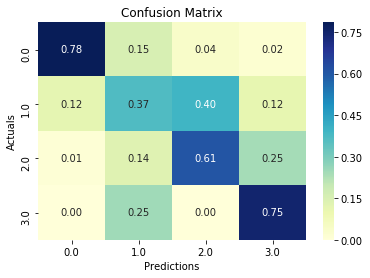

In [56]:
sns.heatmap(confusion_matrix, annot=True, fmt='.2f', cmap="YlGnBu").set_title('Confusion Matrix') 

Accuracy: 0.712


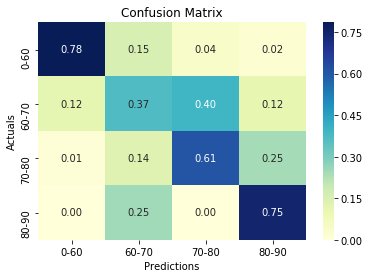

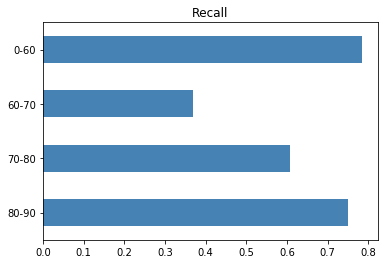

In [57]:
# evaluate metrics of the model trained with balanced class weights
evaluate_metrics(balanced_multiclass_predictor, X_test, y_test)

In [47]:
label_map={0:"0-60", 1:"60-70", 2:"70-80", 3:"80-90", 4:"90-100"}

In [67]:
np.vectorize(lambda x: label_map[x])

In [46]:
def evaluate_metrics(predictor, X_test, test_labels):
    """
    Evaluate a model on a test set using the given prediction endpoint. Display classification metrics.
    """
    # split the test dataset into 100 batches and evaluate using prediction endpoint
    prediction_batches = [predictor.predict(batch) for batch in np.array_split(X_test, 100)]

    # parse protobuf responses to extract predicted labels
    extract_label = lambda x: x.label['predicted_label'].float32_tensor.values
    test_preds = np.concatenate([np.array([extract_label(x) for x in batch]) for batch in prediction_batches])
    #data["y_pred"]=test_preds
    test_preds = test_preds.reshape((-1,))
    
    # calculate accuracy
    accuracy = (test_preds == y_test).sum() / y_test.shape[0]
    
    # calculate recall for each class
    recall_per_class, classes = [], []
    for target_label in np.unique(test_labels):
        recall_numerator = np.logical_and(test_preds == target_label, test_labels == target_label).sum()
        recall_denominator = (test_labels == target_label).sum()
        recall_per_class.append(recall_numerator / recall_denominator)
        classes.append(label_map[target_label])
    recall = pd.DataFrame({'recall': recall_per_class, 'class_label': classes})
    recall.sort_values('class_label', ascending=False, inplace=True)
    recall.head()

    # calculate confusion matrix
    label_mapper = np.vectorize(lambda x: label_map[x])
    confusion_matrix = pd.crosstab(label_mapper(y_test), label_mapper(test_preds), 
                                   rownames=['Actuals'], colnames=['Predictions'], normalize='index')

    # display results
    sns.heatmap(confusion_matrix, annot=True, fmt='.2f', cmap="YlGnBu").set_title('Confusion Matrix')  
    plt.savefig("confusion_matrix.png")
    ax = recall.plot(kind='barh', x='class_label', y='recall', color='steelblue', title='Recall', legend=False)
    ax.set_ylabel('')
    print('Accuracy: {:.3f}'.format(accuracy))
   
    #data["y_pred"]=test_preds.reshape(1,)
    #3type(test_preds)
    

In [58]:
balanced_multiclass_predictor.delete_endpoint()